<a href="https://colab.research.google.com/github/selfmaded/python_study/blob/master/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **의사결정트리 알고리즘** 

**라이브러리 import**

In [ ]:
import pandas as pd

**데이터 수집**

In [ ]:
district_dict_list = [ # 자치구별 dictionary list 선언
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list) # district_dict_list를 pandas의 DataFrame 형식으로 변환
train_df = train_df[['district', 'longitude', 'latitude', 'label']] #컬럼명 순서 변경

In [ ]:
dong_dict_list = [ #동별 dicionary list 선언
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list) # dong_dict_list를 pandas의 DataFrame 형식으로 변환
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [ ]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
print(train_df.label.value_counts()) # train_df의 각 label의 개수를 카운트하여 출력
print(test_df.label.value_counts()) # test_df의 각 label의 개수를 카운트하여 출력

**데이터 탐색**

In [ ]:
train_df.head() # train_df의 상위 5개 데이터 반환

In [ ]:
test_df.head() # test_df의 상위 5개 데이터 반환

**데이터 시각화**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 경도, 위도에 따른 데이터 시각화
sns.lmplot('longitude', 'latitude', data=train_df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x", "+", "*"], # point marker 모양 설정(o,x,+,*)
           hue="label") # label단위로 구분하여 시각화

**데이터 다듬기**

In [ ]:
train_df.drop(['district'], axis=1, inplace = True) # train_df에서 district 데이터 삭제
test_df.drop(['dong'], axis=1, inplace = True) # test_df에서 dong 데이터 삭제

X_train = train_df[['longitude', 'latitude']] # train_df의 longitude와 laitude데이터를 X_train에 대입하여 선언
y_train = train_df[['label']] # train_df의 label 데이터를 y_train에 대입하여 선언

X_test = test_df[['longitude', 'latitude']] # test_df의 longitude와 laitude데이터를 X_test에 대입하여 선언
y_test = test_df[['label']] # test_df의 label 데이터를 y_test에 대입하여 선언

In [ ]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
def display_decision_surface(clf,X, y): # clf, X, y를 입력으로 받는 display_decision_surface 함수 정의
    
    # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01 # X의 longitude 데이터 최소값에서 0.01을 빼고 x_min에 대입하여 선언
    x_max = X.longitude.max() + 0.01 # X의 longitude 데이터 최대값에서 0.01을 더하고 x_max에 대입하여 선언
    y_min = X.latitude.min() - 0.01 # X의 latitude 데이터 최소값에서 0.01을 빼고 y_min에 대입하여 선언 
    y_max = X.latitude.max() + 0.01 # X의 latitude 데이터 최대값에서 0.01을 더하고 y_max에 대입하여 선언 
    
    # 파라미터 설정
    n_classes = len(le.classes_) # le_classes_의 길이를 n_classes에 대입하여 선언
    plot_colors = "rywb" # plot_color에 문자열 "rywb"를 대입하여 선언
    plot_step = 0.001 # plot_step에 0.001을 대입하여 선언

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), # (x_min, x_max), (y_min, y_max) 번위를 갖는 meshgrid를 xx, yy에 대입하여 선언
                        np.arange(y_min, y_max, plot_step)) 
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # clf 모델을 통해 label 예측
    Z = Z.reshape(xx.shape) # xx의 형태로 Z값 reshape
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) # matplotlib contourf을 사용하여 예측 결과 시각화 cmap: colormap 설정

    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors): #i에는 class_num의 범위만큼, color에는 plot_colors('rywb')를 차례로 대입하면서 반복
        idx = np.where(y == i) # y와 i의 값이 같은 index를 idx에 대입하여 선언
        plt.scatter(X.loc[idx].longitude, # X[idx]의 longitude, latitude 데이터로 scatter plot 생성
                    X.loc[idx].latitude, 
                    c=color,  # color 설정
                    label=le.classes_[i], # label은 le_classes_[i]로 설정
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=200) # cmap: colormap 설정, edgecolor: pointer edge color, s: marker size

    
    plt.title("Decision surface of a decision tree",fontsize=16) # 챠트 제목 설정, fontsize=16 설정
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14) # 범주 박스 위치 설정 /  bbox_to_achor: bbox 좌표 설정, loc: 위치 설정, borderaxespad: legend와 axes사이의 패딩 설정 , fontsize: 폰트 사이즈
    plt.xlabel('longitude',fontsize=16) # x축의 이름과 폰트 크기 설정
    plt.ylabel('latitude',fontsize=16)  # y축의 이름과 폰트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5] # 챠트 크기 설정
    plt.rcParams["font.size"] = 14   # 챠트 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14 # x축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14 # y축 좌표상의 폰트 크기 설정
    plt.show()  # 챠트 그리기

**파라미터 없이 학습하기**

In [ ]:
le = preprocessing.LabelEncoder() # preprocessing LabelEncoder를 선언하여 le에 대입
y_encoded = le.fit_transform(y_train) # 카테고리형 자료를 숫자로 변경

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded) # random_state를 35로 설정, 입력데이터:X_train, 타겟데이터:y_encoded로 Decision Tree를 학습한 후 학습된 모델을 clf에 대입하여 선언
display_decision_surface(clf, X_train, y_encoded) # display_deicsion_surface 함수 호출

**파라미터를 설정하여 학습하기**

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=4,          #max_depth : 트리의 최대 한도 깊이  
                                  min_samples_split=2,  #min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 갯수  
                                  min_samples_leaf=2,   #mins_samples_leaf : 맨 마지막 끝 노드의 최소 데이터 갯수  
                                  random_state=70).fit(X_train, y_encoded.ravel()) #random_state : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터 
display_decision_surface(clf,X_train, y_encoded) # display_deicsion_surface 함수 호출

**의사결정트리 시각화**

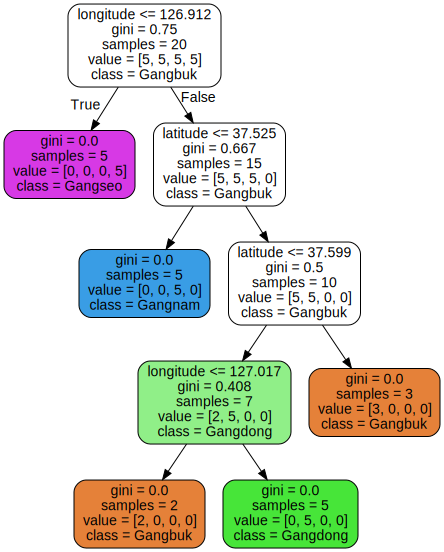

In [ ]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, # graphviz을 사용하여 clf 트리 시각화
                                feature_names=['longitude','latitude'],  # feature name 설정
                                class_names=['Gangbuk', 'Gangdong',  # class name 설정
                                             'Gangnam', 'Gangseo'],
                                filled=True, rounded=True)  # filled: 노드 클래스를 색으로 구분, rounded: 노드 상자의 모서리를 둥글게 설정
graph = graphviz.Source(dot_data) # dot_data로 그래프 생성하여 graph에 대입하여 선언
graph

# gini : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
# samples : 노드 안에 들어 있는 데이터의 갯수  
# value : 분류값 별 데이터의 갯수   
# class :  분류값

**테스트**

In [ ]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test) # X_test 데이터를 clf 모델의 입력으로 사용하여 정답 예측

In [ ]:
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), # y_test value와 le.classes_[pred]를 통해 accuracy를 계산하고 이를 출력
                                          le.classes_[pred])) )
comparison = pd.DataFrame({'prediction':le.classes_[pred], # le.classes_[pred]와 y_test를 pandas DataFrame으로 생성 후 comparison에 대입하여 선언
                           'ground_truth':y_test.values.ravel()}) 
comparison

# **가우시안 나이브 베이즈 분류** 

**필요한 라이브러리 import**

In [ ]:
# 시각화를 위해 pandas를 임포트합니다
import pandas as pd
# iris 데이터는 sklearn에서 직접 로드할 수 있습니다
from sklearn.datasets import load_iris
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있습니다
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes로 iris 데이터를 분류하도록 하겠습니다
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics와 accuracy_score를 임포트합니다
from sklearn import metrics
from sklearn.metrics import accuracy_score

**데이터 획득 및 탐색**

In [ ]:
dataset = load_iris() # iris 데이터를 불러옵니다
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) # pandas의 데이터프레임으로 데이터를 저장합니다
df['target'] = dataset.target # 데이터셋의 타겟 데이터를 데이터프레임에 저장합니다
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"}) # df의 타겟 데이터를 숫자에서 문자로 mapping
df.head() # df 데이터의 상위 5개 데이터 반환

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.target.value_counts() # df target 데이터 집계하여 출력

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

**iris 데이터 시각화**

In [ ]:
# 분류값 별로 데이터프레임을 나눕니다
setosa_df = df[df.target == "setosa"] # df 타겟 데이터 "setosa"를 setosa_df에 대입하여 선언
versicolor_df = df[df.target == "versicolor"] # df 타겟 데이터 "versicolor"를 versicolor_df에 대입하여 선언
virginica_df = df[df.target == "virginica"] # df 타겟 데이터 "virginica"를 virginica_df에 대입하여 선언

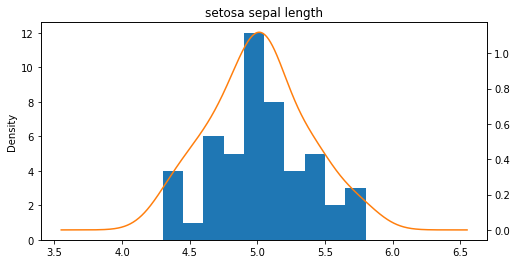

In [ ]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist') # setosa_df sepal length (cm) 데이터로 히스토그램 그래프 생성 및 ax에 대입하여 선언
setosa_df['sepal length (cm)'].plot(kind='kde', # setosa_df sepal length (cm) 데이터로 커널 밀도 추정(kde) 그래프와 ax 그래프를 함께 생성
                                    ax=ax, 
                                    secondary_y=True, # second y축 설정
                                    title="setosa sepal length", # title 설정
                                    figsize = (8,4)) # figure size 설정

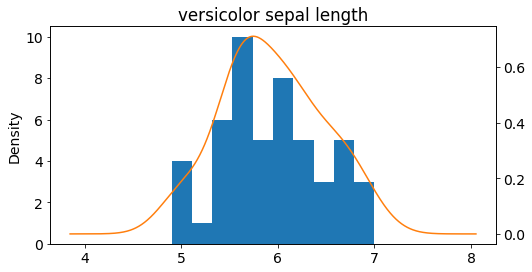

In [ ]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist') # versicolor_df sepal length (cm) 데이터로 히스토그램 그래프 생성 및 ax에 대입하여 선언
versicolor_df['sepal length (cm)'].plot(kind='kde', # versicolor_df sepal length (cm) 데이터로 커널 밀도 추정(kde) 그래프와 ax 그래프를 함께 생성
                                        ax=ax, 
                                        secondary_y=True, # second y축 설정
                                        title="versicolor sepal length", # title 설정
                                        figsize = (8,4)) # figure size 설정

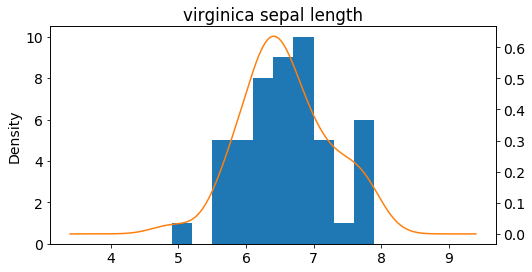

In [ ]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist') # virginica_df sepal length (cm) 데이터로 히스토그램 그래프 생성 및 ax에 대입하여 선언
virginica_df['sepal length (cm)'].plot(kind='kde', # virginica_df sepal length (cm) 데이터로 커널 밀도 추정(kde) 그래프와 ax 그래프를 함께 생성
                                       ax=ax, 
                                       secondary_y=True, # second y축 설정
                                       title="virginica sepal length", # title 설정
                                       figsize = (8,4)) # figure size 설정

**학습/테스트 데이터 나누기**

In [ ]:
# 20%를 테스트 데이터로 분류합니다
X_train,X_test,y_train,y_test=train_test_split(dataset.data, # dataset에서 data를 입력, target을 타겟 데이터로 설정하고 테스트 데이터 크기를 전체의 20%로 설정
                                               dataset.target,test_size=0.2)

**Gaussian Naive Bayes 분류하기**

In [ ]:
# 학습데이터로 모델을 학습합니다
model = GaussianNB() # GaussianNB 모델 선언
model.fit(X_train, y_train) # X_train, y_train 데이터로 model 핛브

# 테스트 데이터로 모델을 테스트합니다
expected = y_test # y_test 값을 expected에 대입하여 선언
predicted = model.predict(X_test) # X_test 데이터를 입력으로 사용하여 결과 예측

In [ ]:
print(metrics.classification_report(y_test, predicted)) # y_test와 predicted 값을 통해 분류 리포트 출력
print(accuracy_score(y_test, predicted)) # y_test와 predicted 값으로 accuracy 계산

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


**혼동 행렬**

In [ ]:
print(metrics.confusion_matrix(expected, predicted))  # expected, predicted confusion matrix 출력

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]


# **베르누이 나이브 베이즈 분류**

In [ ]:
import numpy as np
import pandas as pd

# 베르누이 나이브베이즈를 위한 라이브러리를 임포트합니다
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

# 모델의 정확도 평가를 위해 임포트합니다
from sklearn.metrics import accuracy_score

**데이터 획득 및 탐색**

In [ ]:
email_list = [ # email list 선언
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]
df = pd.DataFrame(email_list) # email_list를 DataFrame 형식으로 만들어 df에 대입
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


**데이터 다듬기**

In [ ]:
df['label'] = df['spam'].map({True:1,False:0}) # df spam 데이터 True/False를 1/0으로 mapping
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [ ]:
# 학습에 사용될 데이터와 분류값을 나눕니다
df_x=df["email title"] # df email title 데이터를 df_x에 대입하여 선언
df_y=df["label"] # df label 데이터를 df_y에 대입하여 선언

cv = CountVectorizer(binary=True) # CountVectorizer 선언
x_traincv=cv.fit_transform(df_x) # 문장 벡터화
encoded_input=x_traincv.toarray() # x_traincv를 array 형태로 변환하고 encoded_input에 대입하여 선언
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [ ]:
cv.inverse_transform(encoded_input[0]) # encoded_input[0] 데이터의 역수를 반환

[array([u'free', u'game', u'only', u'today'], dtype='<U9')]

In [ ]:
cv.get_feature_names() # cv의 feature name들 반환

[u'attached',
 u'card',
 u'cheapest',
 u'credit',
 u'deal',
 u'flight',
 u'free',
 u'game',
 u'limited',
 u'meeting',
 u'offer',
 u'only',
 u'schedule',
 u'statement',
 u'time',
 u'today',
 u'your']

**베르누이 나이브베이즈 분류**

In [ ]:
# 학습 데이터로 베르누이 분류기를 학습합니다
bnb = BernoulliNB() # BernoulliNb 선언 
y_train=df_y # df_y를 y_train에 대입하여 선언
bnb.fit(x_traincv,y_train) # x_train_cv, y_train 데이터로 bnb 모델 학습

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
# 테스트 데이터 다듬기
test_email_list = [ # test_email_list 선언
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]
test_df = pd.DataFrame(test_email_list) # test_email_list를 DataFrame 형식으로 선언하여 test_df에 대입
test_df['label'] = test_df['spam'].map({True:1,False:0}) # test_df spam 데이터 True/False를 1/0으로 mapping
test_x=test_df["email title"] # test_df email title을 test_x에 대입하여 선언
test_y=test_df["label"] # test_df label 데이터를 test_y에 대입하여 선언
x_testcv=cv.transform(test_x) # test_x 데이터 벡터화

**테스트**

In [ ]:
predictions=bnb.predict(x_testcv) # x_testcv 데이터를 bnb 모델에 적용하여 결과 예측
accuracy_score(test_y, predictions) # test_y와 predictions를 통해 정확도 계산

0.8333333333333334